In [1]:
from zprop import propagator
from zprop import circuits, plots
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

In [2]:
n_shot = 100
ansatz = circuits.wall_nn_no_enc
n_qubit = 10
n_iteration = 5
model = propagator.Propagator(n_qubit=n_qubit, n_iteration=n_iteration, ansatz=ansatz, k1=None, k2=None)
pp_p = np.pi*(2*np.random.rand(n_shot, model.n_p_p) - 1)
pp_a = np.pi*(2*np.random.rand(n_shot, model.n_p_a) - 1)

def circuit(p_p, p_a, n_qubit, n_iteration):
    ansatz(p_p, p_a, n_qubit, n_iteration = n_iteration)
    return [qml.expval(qml.PauliZ(q)) for q in range(n_qubit)]

q_circuit = qml.QNode(circuit, device=qml.device('default.qubit', n_qubit))
p_true = [q_circuit(p_p, p_a, n_qubit, n_iteration) for p_p, p_a in zip(pp_p, pp_a)]

def get_approximation(appr_f, pp_p, pp_a, p_true):
    mse = 0
    for p_p, p_a, true in zip(pp_p, pp_a, p_true):
        mse += np.mean(np.square(np.array(true) - np.array(appr_f(p_p=p_p, p_a=p_a))))
    return mse / len(p_true)

In [3]:
model = propagator.Propagator(n_qubit=n_qubit, n_iteration=n_iteration, ansatz=ansatz, k1=None, k2=None)
print(model); print()
model.to_expr()

Propagator
  Number of qubits : 10
  Trainable parameters : 46
  Cutoff 1: None | Cutoff 2: None
0: ──H─╭●──RY──||─────────||─╭●──RY──||─────────||─╭●──RY──||─┤  <Z>
1: ──H─╰X──RY──||─╭●──RX──||─╰X──RY──||─╭●──RX──||─╰X──RY──||─┤  <Z>
2: ──H─╭●──RY──||─╰X──RX──||─╭●──RY──||─╰X──RX──||─╭●──RY──||─┤  <Z>
3: ──H─╰X──RY──||─╭●──RX──||─╰X──RY──||─╭●──RX──||─╰X──RY──||─┤  <Z>
4: ──H─╭●──RY──||─╰X──RX──||─╭●──RY──||─╰X──RX──||─╭●──RY──||─┤  <Z>
5: ──H─╰X──RY──||─╭●──RX──||─╰X──RY──||─╭●──RX──||─╰X──RY──||─┤  <Z>
6: ──H─╭●──RY──||─╰X──RX──||─╭●──RY──||─╰X──RX──||─╭●──RY──||─┤  <Z>
7: ──H─╰X──RY──||─╭●──RX──||─╰X──RY──||─╭●──RX──||─╰X──RY──||─┤  <Z>
8: ──H─╭●──RY──||─╰X──RX──||─╭●──RY──||─╰X──RX──||─╭●──RY──||─┤  <Z>
9: ──H─╰X──RY──||─────────||─╰X──RY──||─────────||─╰X──RY──||─┤  <Z>

Z₀ = sin(p₀)⋅sin(p₁₈)⋅sin(p₃₆)⋅cos(p₁)⋅cos(p₁₉)⋅cos(p₂₀)⋅cos(p₃)⋅cos(p₄) - sin
(p₀)⋅cos(p₁₈)⋅cos(p₃₆) + sin(p₁)⋅sin(p₁₈)⋅sin(p₁₉)⋅sin(p₃₆)⋅cos(p₁₀)⋅cos(p₂)⋅c
os(p₂₀)⋅cos(p₃)⋅cos(p₄) - sin(p₁)⋅sin(p₂)⋅sin(p₂₀)⋅sin

$$\begin{align*}
Z_0 = &  + \sin(p_0) \sin(p_{18}) \sin(p_{36}) \cos(p_1) \cos(p_{19}) \cos(p_{20}) \cos(p_3) \cos(p_4) & (\text{length} = 8)\\
& - \sin(p_0) \cos(p_{18}) \cos(p_{36}) & (\text{length} = 3)\\
& + \sin(p_1) \sin(p_{18}) \sin(p_{19}) \sin(p_{36}) \cos(p_{10}) \cos(p_2) \cos(p_{20}) \cos(p_3) \cos(p_4) & (\text{length} = 9)\\
& - \sin(p_1) \sin(p_2) \sin(p_{20}) \sin(p_{36}) \cos(p_0) \cos(p_{11}) \cos(p_{18}) \cos(p_{19}) & (\text{length} = 8)\\
& - \sin(p_{10}) \sin(p_{11}) \sin(p_{18}) \sin(p_{19}) \sin(p_2) \sin(p_{20}) \sin(p_{36}) \cos(p_1) & (\text{length} = 8)\\
& + \sin(p_{18}) \sin(p_{19}) \sin(p_2) \sin(p_{20}) \sin(p_{36}) \cos(p_{10}) \cos(p_{11}) & (\text{length} = 7)\\
& - \sin(p_{18}) \cos(p_0) \cos(p_1) \cos(p_2) \cos(p_{36}) & (\text{length} = 5)\\
& - \sin(p_{36}) \cos(p_0) \cos(p_{18}) \cos(p_{19}) \cos(p_2) \cos(p_{20}) \cos(p_3) \cos(p_4) & (\text{length} = 8) 
\end{align*}$$

if $k_2 = 7$:

$$\begin{align*}
Z_0 \approx &  + \cancel{\sin(p_0) \sin(p_{18}) \sin(p_{36}) \cos(p_1) \cos(p_{19}) \cos(p_{20}) \cos(p_3) \cos(p_4)} & (\text{length} = 8)\\
& - \sin(p_0) \cos(p_{18}) \cos(p_{36}) & (\text{length} = 3)\\
& \cancel{+ \sin(p_1) \sin(p_{18}) \sin(p_{19}) \sin(p_{36}) \cos(p_{10}) \cos(p_2) \cos(p_{20}) \cos(p_3) \cos(p_4)} & (\text{length} = 9)\\
& \cancel{- \sin(p_1) \sin(p_2) \sin(p_{20}) \sin(p_{36}) \cos(p_0) \cos(p_{11}) \cos(p_{18}) \cos(p_{19})} & (\text{length} = 8)\\
& \cancel{- \sin(p_{10}) \sin(p_{11}) \sin(p_{18}) \sin(p_{19}) \sin(p_2) \sin(p_{20}) \sin(p_{36}) \cos(p_1)} & (\text{length} = 8)\\
& + \sin(p_{18}) \sin(p_{19}) \sin(p_2) \sin(p_{20}) \sin(p_{36}) \cos(p_{10}) \cos(p_{11}) & (\text{length} = 7)\\
& - \sin(p_{18}) \cos(p_0) \cos(p_1) \cos(p_2) \cos(p_{36}) & (\text{length} = 5)\\
& \cancel{- \sin(p_{36}) \cos(p_0) \cos(p_{18}) \cos(p_{19}) \cos(p_2) \cos(p_{20}) \cos(p_3) \cos(p_4) } & (\text{length} = 8) 
\end{align*}$$

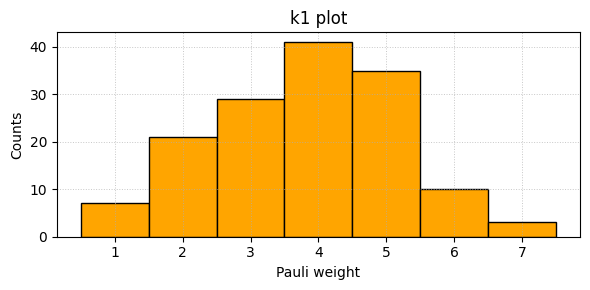

In [4]:
model.plot_k1dist()

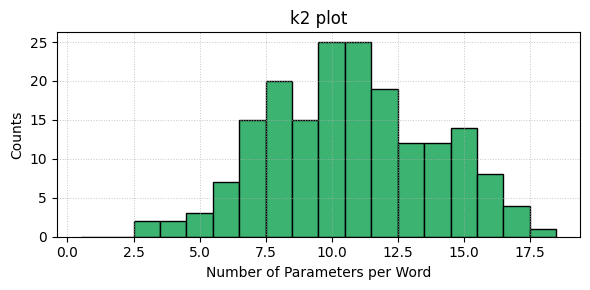

In [5]:
model.plot_k2dist()

In [6]:
f_exact, s_exact = model.Hlambdify()

print(f"MSE {get_approximation(f_exact, pp_p, pp_a, p_true)}")

MSE 1.999329966086574e-15


### Study on K1

In [7]:
p_k1 = np.arange(10) + 1

MSE_k1 = []
for k1 in p_k1:
    model = propagator.Propagator(n_qubit=n_qubit, n_iteration=n_iteration, ansatz=ansatz, k1=k1, k2=None)
    f_appr, s_appr = model.Hlambdify()
    MSE_k1.append(get_approximation(f_appr, pp_p, pp_a, p_true))


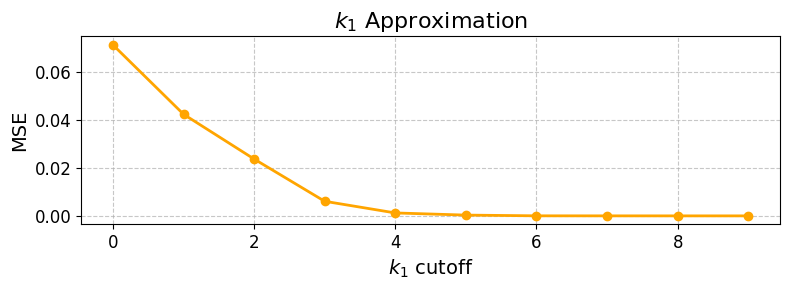

In [8]:
plt.figure(figsize=(8, 3))  
plt.plot(MSE_k1, marker='o', linestyle='-', color=plots.colors["k1"], markersize=6, linewidth=2)  
plt.xlabel(r'$k_1$ cutoff', fontsize=14)  
plt.ylabel('MSE', fontsize=14)  
plt.title('$k_1$ Approximation', fontsize=16)  
plt.grid(True, linestyle='--', alpha=0.7)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.tight_layout()  
plt.show()

### Study on k2

In [9]:
p_k2 = np.arange(10) + 2

MSE_k2 = []
for k2 in p_k2:
    model = propagator.Propagator(n_qubit=n_qubit, n_iteration=n_iteration, ansatz=ansatz, k1=None, k2=k2)
    f_appr, s_appr = model.Hlambdify()
    MSE_k2.append(get_approximation(f_appr, pp_p, pp_a, p_true))


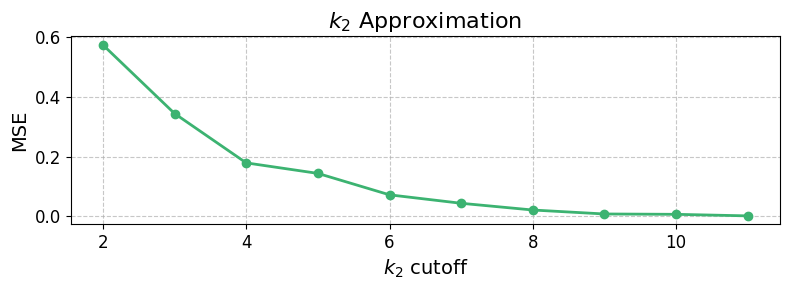

In [10]:
plt.figure(figsize=(8, 3))  
plt.plot(p_k2, MSE_k2, marker='o', linestyle='-', color=plots.colors["k2"], markersize=6, linewidth=2)  
plt.xlabel(r'$k_2$ cutoff', fontsize=14)  
plt.ylabel('MSE', fontsize=14)  
plt.title('$k_2$ Approximation', fontsize=16)  
plt.grid(True, linestyle='--', alpha=0.7)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.tight_layout()  
plt.show()

### Study on both

In [11]:
p_k1 = np.arange(11) + 1
p_k2 = np.arange(11) + 2

MSE_both = np.zeros(shape= (len(p_k1), len(p_k2)))
for i1, k1 in enumerate(p_k1):
    for i2, k2 in enumerate(p_k2):
        model = propagator.Propagator(n_qubit=n_qubit, n_iteration=n_iteration, ansatz=ansatz, k1=k1, k2=k2)
        f_appr, s_appr = model.Hlambdify()
        MSE_both[i1, i2] = get_approximation(f_appr, pp_p, pp_a, p_true)


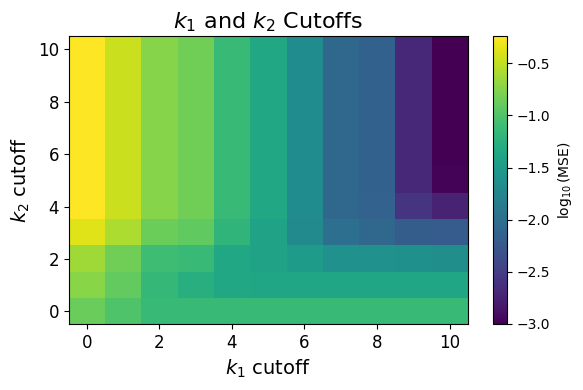

In [12]:
plt.figure(figsize=(6, 4))
log_MSE_both = np.log10(MSE_both + 1e-10)  # Avoid log of zero by adding a small constant
plt.imshow(log_MSE_both, origin="lower", cmap="viridis", aspect="auto")
plt.colorbar(label=r"$\log_{10}(\mathrm{MSE})$")
plt.xlabel(r"$k_1$ cutoff", fontsize=14)
plt.ylabel(r"$k_2$ cutoff", fontsize=14)
plt.title(r"$k_1$ and $k_2$ Cutoffs", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

### Variance in the gradient

In [13]:
model = propagator.Propagator(n_qubit=n_qubit, n_iteration=n_iteration, ansatz=ansatz, k1=None, k2=None)
gradient_list = model.get_Hprime()

In [14]:
p_contribution = []
for p_idx, p_dict in enumerate(gradient_list):
    contribution = 0
    for q_idx, q_dict in enumerate(p_dict):
        for val in q_dict.values():
            for v in val:
                if len(v) > 1:
                    n_trig = len(v[1:]) - 1
                    contribution += (.5)**n_trig
    p_contribution.append(contribution)

<BarContainer object of 46 artists>

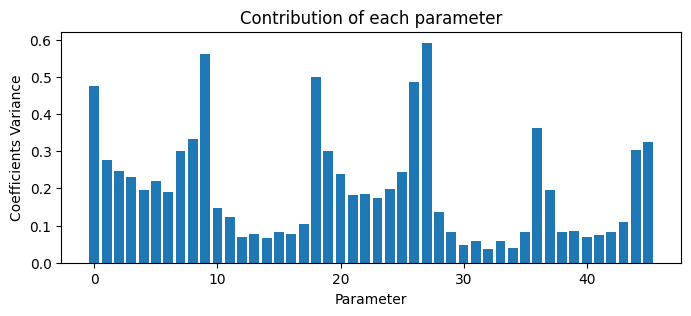

In [15]:
plt.figure(figsize=(8,3))
plt.title("Contribution of each parameter")
plt.xlabel("Parameter")
plt.ylabel("Coefficients Variance")
plt.bar(np.arange(len(p_contribution)), p_contribution)

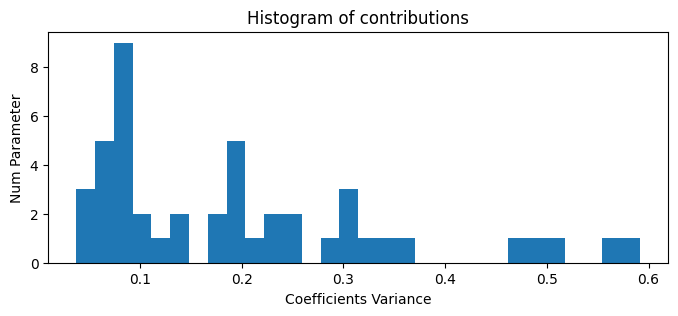

In [16]:
plt.figure(figsize=(8,3))
plt.title("Histogram of contributions")
plt.ylabel("Num Parameter")
plt.xlabel("Coefficients Variance")
plt.hist(p_contribution, bins=30);

### Barren plateau study

If $\theta$ represents the parameters of a PQC, and $C(\theta)$ is the cost function, the barren plateau phenomenon is characterized by:

$$
\mathbb{E}\left[\frac{\partial C}{\partial \theta_i}\right] = 0,
$$

$$
\mathbb{E}\left[\left(\frac{\partial C}{\partial \theta_i}\right)^2\right] \propto \frac{1}{2^n},
$$

where $n$ is the number of qubits. The variance of the gradient, $\mathbb{E}\left[\left(\frac{\partial C}{\partial \theta_i}\right)^2\right]$, decays exponentially as the number of qubits increases, leading to vanishing gradients and making optimization challenging.


In [17]:
from zprop import loss
from jax import grad

In [18]:
def evaluate_gradient(n_qubit, n_iteration, plot = False):
    model = propagator.Propagator(n_qubit=n_qubit, n_iteration=n_iteration, ansatz=ansatz, k1=5, k2=10)
    if plot:
        print(f"n_q = {n_qubit} | depth = {n_iteration}")
        model.plot_k2dist()
    prop_func, _ = model.Hlambdify()

    dLdF = grad(loss.mmd)
    dFdp = model.Hprimelambdify()[0]

    n_img = 100
    p_sigma = [1e-3, 1e-2, 1e-1]
    noise = 1e-5
    p_img_true = 2*(np.random.rand(n_img, n_qubit) - 1)

    def grad_prop(p_p, p_a):
        output = np.array(prop_func(p_p, p_a))
        mmd = loss.mmd(output, p_img_true, sigmas=p_sigma, noise=noise)
        A = np.array(dLdF(output, p_img_true, sigmas=p_sigma, noise=noise))
        B = np.array(dFdp(p_p, p_a))
        return np.square(np.einsum('b,ab->a', A, B)), mmd

    pp_p = np.random.rand(1000, model.n_p_p)
    pp_a = np.random.rand(1000, model.n_p_a)
    pp_grad, p_loss = [], []
    for p_p, p_a in zip(pp_p, pp_a):
        p_grad, loss_value = grad_prop(p_p, p_a)
        pp_grad.append(p_grad)
        p_loss.append(loss_value)

    return pp_grad, p_loss

### Study on number of qubits

n_q = 5 | depth = 3


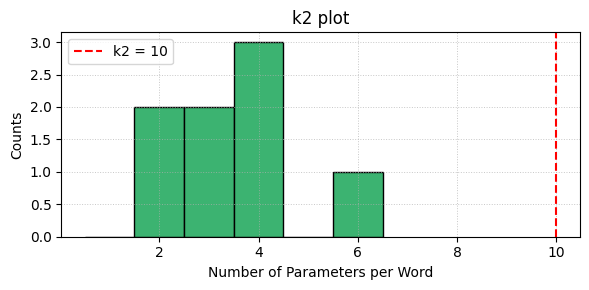

n_q = 10 | depth = 3


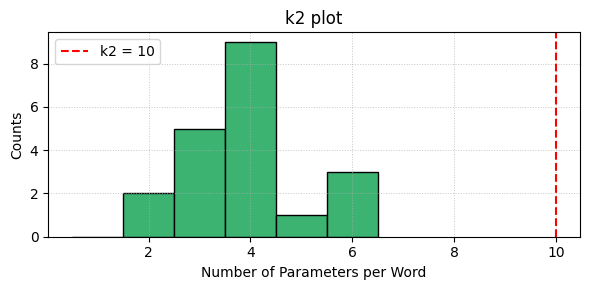

n_q = 15 | depth = 3


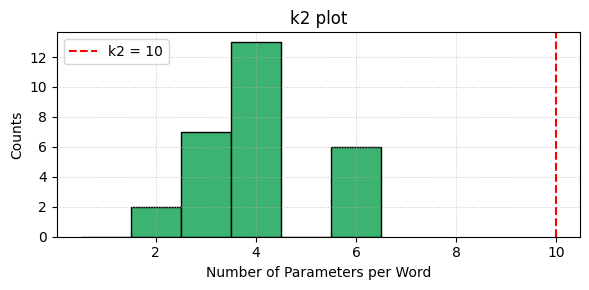

n_q = 20 | depth = 3


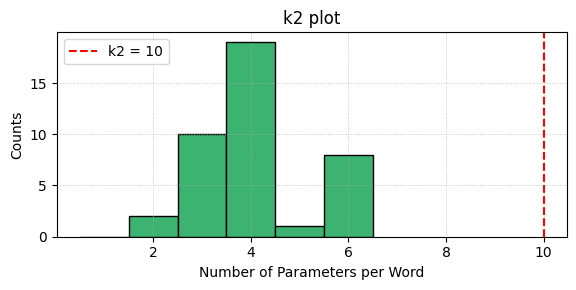

n_q = 25 | depth = 3


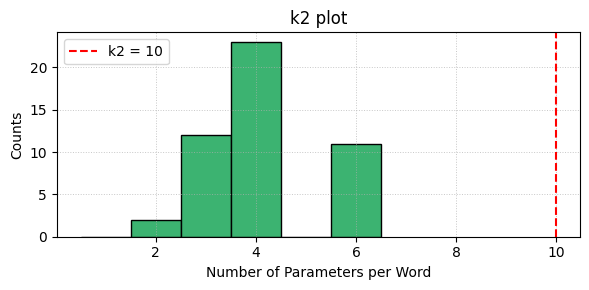

n_q = 30 | depth = 3


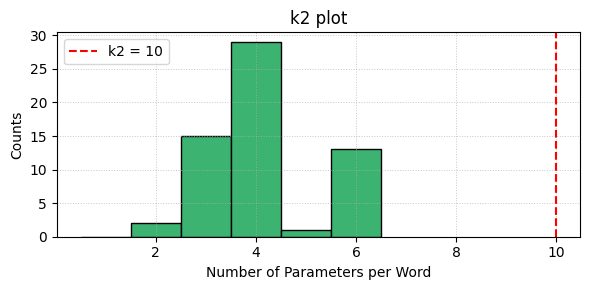

In [19]:
p_n_qubit = np.arange(5,31,5)
p_grad_qubit_mean = []
p_grad_qubit_std = []
p_loss_qubit_mean = []
p_loss_qubit_std = []
for n_qubit in p_n_qubit:
    g, l = evaluate_gradient(n_qubit, 3, True)
    p_grad_qubit_mean.append(np.mean(g))
    p_grad_qubit_std.append(np.std(g))
    p_loss_qubit_mean.append(np.mean(l))
    p_loss_qubit_std.append(np.std(l))
    

p_grad_qubit_mean, p_grad_qubit_std = np.array(p_grad_qubit_mean), np.array(p_grad_qubit_std)
p_loss_qubit_mean, p_loss_qubit_std = np.array(p_loss_qubit_mean), np.array(p_loss_qubit_std)

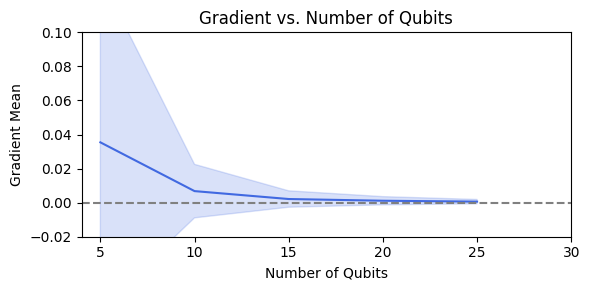

In [37]:
# Create a figure and subplots
plt.figure(figsize=(6, 3))  # 2 rows, 1 column

# First plot: gradient vs. number of qubits
plt.plot(p_n_qubit, p_grad_qubit_mean, color="royalblue")
plt.axhline(y=0, ls='--', color='gray')
plt.fill_between(p_n_qubit, p_grad_qubit_mean + p_grad_qubit_std, p_grad_qubit_mean - p_grad_qubit_std, alpha=.2, color="royalblue")
plt.title('Gradient vs. Number of Qubits')
plt.xlabel('Number of Qubits')
plt.ylabel('Gradient Mean')
plt.ylim((-0.02, .1))
plt.xticks(p_n_qubit)

# plt.plot(np.arange(min(p_n_qubit), max(p_n_qubit)), (.5)**(np.arange(min(p_n_qubit), max(p_n_qubit))), color = 'gray', ls = '--')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

### Study on depth

In [21]:
n_qubit = 8

n_q = 8 | depth = 2


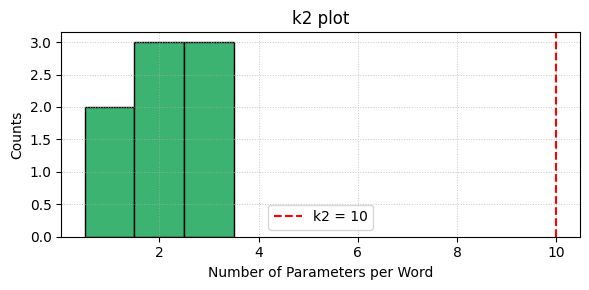

n_q = 8 | depth = 3


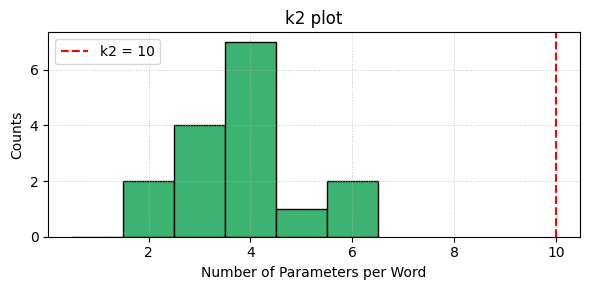

n_q = 8 | depth = 4


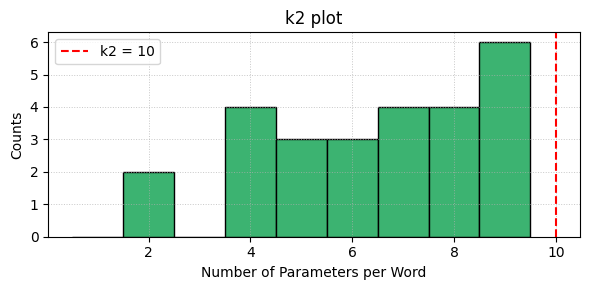

n_q = 8 | depth = 5


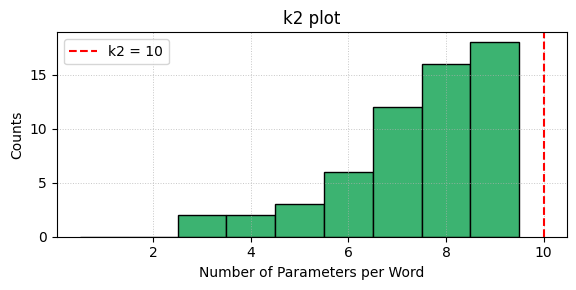

n_q = 8 | depth = 6


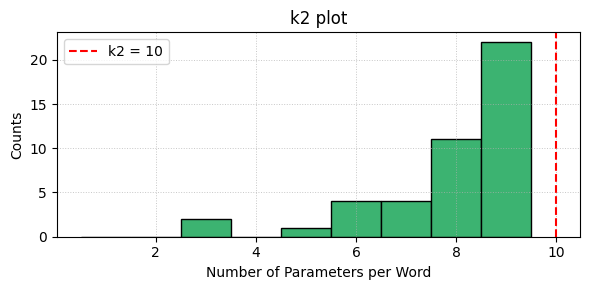

In [22]:
p_n_iteration = np.arange(2,7,1)
p_grad_depth_mean = []
p_grad_depth_std = []
p_loss_depth_mean = []
p_loss_depth_std = []
for n_iteration in p_n_iteration:
    g, l = evaluate_gradient(n_qubit, n_iteration, True)
    p_grad_depth_mean.append(np.mean(g))
    p_grad_depth_std.append(np.std(g))
    p_loss_depth_mean.append(np.mean(l))
    p_loss_depth_std.append(np.std(l))
    

p_grad_depth_mean, p_grad_depth_std = np.array(p_grad_depth_mean), np.array(p_grad_depth_std)
p_loss_depth_mean, p_loss_depth_std = np.array(p_loss_depth_mean), np.array(p_loss_depth_std)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


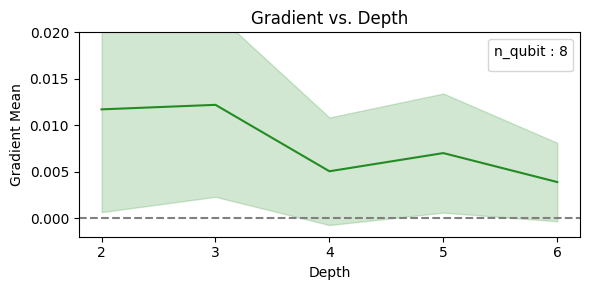

In [30]:
# Create a figure and subplots
plt.figure(figsize=(6, 3))  # 2 rows, 1 column

# First plot: gradient vs. number of qubits
plt.plot(p_n_iteration, p_grad_depth_mean, color="forestgreen")
plt.axhline(y=0, ls='--', color='gray')
plt.fill_between(p_n_iteration, p_grad_depth_mean + p_grad_depth_std/3, p_grad_depth_mean - p_grad_depth_std/3, alpha=.2, color="forestgreen")
plt.title('Gradient vs. Depth')
plt.xlabel('Depth')
plt.ylabel('Gradient Mean')
plt.ylim((-0.002, .02))
plt.legend(title=f"n_qubit : {n_qubit}")
plt.xticks(p_n_iteration)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()